In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math as math

%matplotlib inline

In [2]:
tabla_completa = pd.read_csv('events.csv');
tabla_completa

C:\Users\Santi\AppData\Roaming\Python\Python36\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2018-05-29 13:29:26,visited site,0006a21a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Rio de Janeiro,Rio de Janeiro,Brazil,Smartphone,360x640,Android 5.1.1,Android 5.1
6,2018-05-29 13:29:27,ad campaign hit,0006a21a,/comprar/samsung/galaxy-s8,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2018-05-29 13:29:35,checkout,0006a21a,NaN,15338,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2018-04-09 20:12:31,generic listing,000a54b2,NaN,NaN,NaN,NaN,NaN,NaN,"10310,13333,13347,9902,9944,12774,12801,12744,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2018-04-09 20:12:31,visited site,000a54b2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Rio de Janeiro,Rio de Janeiro,Brazil,Computer,1920x1080,Windows 10,Chrome 65.0


In [3]:
tabla_completa['event']=tabla_completa['event'].astype('category')
tabla_completa['timestamp']=pd.to_datetime(tabla_completa['timestamp'])
tabla_completa.dtypes

timestamp                   datetime64[ns]
event                             category
person                              object
url                                 object
sku                                 object
model                               object
condition                           object
storage                             object
color                               object
skus                                object
search_term                         object
staticpage                          object
campaign_source                     object
search_engine                       object
channel                             object
new_vs_returning                    object
city                                object
region                              object
country                             object
device_type                         object
screen_resolution                   object
operating_system_version            object
browser_version                     object
dtype: obje

In [4]:
viewed_products_r = tabla_completa[tabla_completa['event']=='viewed product']
brand_listing_r = tabla_completa[tabla_completa['event']=='brand listing']
visited_site_r = tabla_completa[tabla_completa['event']=='visited site']
ad_campaig_hit_r = tabla_completa[tabla_completa['event']=='ad campaign hit']
generic_listing_r = tabla_completa[tabla_completa['event']=='generic listing']
searched_products_r = tabla_completa[tabla_completa['event']=='searched products']
checkout_r = tabla_completa[tabla_completa['event']=='checkout']
staticpage_r = tabla_completa[tabla_completa['event']=='staticpage']
conversion_r = tabla_completa[tabla_completa['event']=='conversion']
lead_r = tabla_completa[tabla_completa['event']=='lead']


In [5]:
#Lo siguiente es mucho más comodo con loc, pero me dí cuenta de eso después de haber terminado:

#.drop(["url","sku","model","condition","storage","color","skus","search_term","staticpage","campaign_source","search_engine","channel","new_vs_returning","city","region","country","device_type","screen_resolution","operating_system_version","browser_version"],axis='columns')



viewed_products = viewed_products_r.drop(["url","skus","search_term","staticpage","campaign_source","search_engine","channel","new_vs_returning","city","region","country","device_type","screen_resolution","operating_system_version","browser_version"],axis='columns')
viewed_products.head()

,timestamp,event,person,sku,model,condition,storage,color
2,2018-05-31 23:38:09,viewed product,0004b0a2,2694,iPhone 5s,Bom,32GB,Cinza espacial
4,2018-05-29 13:29:25,viewed product,0006a21a,15338,Samsung Galaxy S8,Bom,64GB,Dourado
13,2018-04-09 20:13:14,viewed product,000a54b2,12661,Motorola Moto Z Play,Muito Bom,32GB,Preto
22,2018-05-24 11:27:47,viewed product,000a54b2,10254,iPhone 7 Plus,Excelente,256GB,Dourado
26,2018-05-24 11:28:59,viewed product,000a54b2,6581,iPhone 6S,Bom,16GB,Cinza espacial


In [6]:
brand_listing = brand_listing_r.drop(["url","sku","model","condition","storage","color","search_term","staticpage","campaign_source","search_engine","channel","new_vs_returning","city","region","country","device_type","screen_resolution","operating_system_version","browser_version"],axis='columns')
brand_listing.head()

,timestamp,event,person,skus
12,2018-04-09 20:12:53,brand listing,000a54b2,"5075,12536,12520,12661,12506,12549,10449,9175,..."
14,2018-04-09 20:13:20,brand listing,000a54b2,"5075,12536,12520,12661,12506,12549,10449,9175,..."
20,2018-05-24 11:26:53,brand listing,000a54b2,"8499,8485,8471,8443"
24,2018-05-24 11:28:10,brand listing,000a54b2,"2694,2711,6011,5904,6931,2830,6023,10294,3647,..."
25,2018-05-24 11:28:36,brand listing,000a54b2,"6931,6888,6847,6957,6902,6832,6581,6875,8965,8..."


In [7]:
visited_site = visited_site_r.drop(["url","sku","model","condition","storage","color","skus","search_term","staticpage","campaign_source","search_engine"],axis='columns')
visited_site.head()

,timestamp,event,person,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
1,2018-05-31 23:38:05,visited site,0004b0a2,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
5,2018-05-29 13:29:26,visited site,0006a21a,Paid,New,Rio de Janeiro,Rio de Janeiro,Brazil,Smartphone,360x640,Android 5.1.1,Android 5.1
9,2018-04-09 20:12:31,visited site,000a54b2,Paid,New,Rio de Janeiro,Rio de Janeiro,Brazil,Computer,1920x1080,Windows 10,Chrome 65.0
16,2018-05-24 11:21:07,visited site,000a54b2,Paid,Returning,Rio de Janeiro,Rio de Janeiro,Brazil,Computer,1920x1080,Windows 10,Chrome 66.0
45,2018-04-06 05:12:05,visited site,00184bf9,Organic,New,Ribeirão Preto,Sao Paulo,Brazil,Computer,1366x768,Windows 10,Chrome 65.0


In [8]:
ad_campaig_hit = ad_campaig_hit_r.drop(["sku","model","condition","storage","color","skus","search_term","staticpage","search_engine","channel","new_vs_returning","city","region","country","device_type","screen_resolution","operating_system_version","browser_version"],axis='columns')
ad_campaig_hit.head()

,timestamp,event,person,url,campaign_source
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,criteo
6,2018-05-29 13:29:27,ad campaign hit,0006a21a,/comprar/samsung/galaxy-s8,criteo
11,2018-04-09 20:12:31,ad campaign hit,000a54b2,/,google
15,2018-05-24 11:21:07,ad campaign hit,000a54b2,/,google
99,2018-05-17 00:08:56,ad campaign hit,0019c395,/comprar/samsung/galaxy-j5,google


In [9]:
generic_listing = generic_listing_r.drop(["url","sku","model","condition","storage","color","search_term","staticpage","campaign_source","search_engine","channel","new_vs_returning","city","region","country","device_type","screen_resolution","operating_system_version","browser_version"],axis='columns')
generic_listing.head()

,timestamp,event,person,skus
8,2018-04-09 20:12:31,generic listing,000a54b2,"10310,13333,13347,9902,9944,12774,12801,12744,..."
18,2018-05-24 11:21:08,generic listing,000a54b2,"6649,7237,2820,2750,6707,6720,7224,12619,12605..."
19,2018-05-24 11:26:34,generic listing,000a54b2,"6649,7237,2820,2750,6707,6720,7224,12619,12605..."
21,2018-05-24 11:26:56,generic listing,000a54b2,"6649,7237,2820,2750,6707,6720,7224,12619,12605..."
23,2018-05-24 11:27:50,generic listing,000a54b2,"6649,7237,2820,2750,6707,6720,7224,12619,12605..."


In [10]:
searched_products = searched_products_r.drop(["url","sku","model","condition","storage","color","staticpage","campaign_source","search_engine","channel","new_vs_returning","city","region","country","device_type","screen_resolution","operating_system_version","browser_version"],axis='columns')
searched_products.head()

,timestamp,event,person,skus,search_term
157,2018-02-06 02:29:49,searched products,00204059,"2692,6819,823,2779,13864,2784,8135,6805,2773,2...",moto g 4
159,2018-02-06 02:32:41,searched products,00204059,"2692,6819,823,2779,13864,2784,8135,6805,2773,2...",moto g 4
238,2018-05-21 19:56:33,searched products,0024ad28,"3371,6357,6371,10896,2718,2777,6001,2694,3191,...",comprar celulares usados bom e barato em poa rs
239,2018-05-21 19:57:28,searched products,0024ad28,"3371,6357,6371,10896,2718,2777,6001,2694,3191,...",comprar celulares seminovos bom e barato em po...
240,2018-05-21 19:57:49,searched products,0024ad28,"3371,6357,6371,10896,2718,2777,6001,2694,3191,...",comprar celulares seminovos bom e barato em po...


In [11]:
checkout = checkout_r.drop(["url","skus","search_term","staticpage","campaign_source","search_engine","channel","new_vs_returning","city","region","country","device_type","screen_resolution","operating_system_version","browser_version"],axis='columns')
checkout.head()

,timestamp,event,person,sku,model,condition,storage,color
3,2018-05-31 23:38:40,checkout,0004b0a2,2694,iPhone 5s,Bom,32GB,Cinza espacial
7,2018-05-29 13:29:35,checkout,0006a21a,15338,Samsung Galaxy S8,Bom,64GB,Dourado
44,2018-05-24 11:34:32,checkout,000a54b2,12660,Motorola Moto Z Play,Bom,32GB,Preto
85,2018-04-06 05:14:58,checkout,00184bf9,6355,Samsung Galaxy J5,Excelente,16GB,Preto
86,2018-04-06 05:18:15,checkout,00184bf9,6355,Samsung Galaxy J5,Excelente,16GB,Preto


In [12]:
staticpage = staticpage_r.drop(["url","sku","model","condition","storage","color","skus","search_term","campaign_source","search_engine","channel","new_vs_returning","city","region","country","device_type","screen_resolution","operating_system_version","browser_version"],axis='columns')
staticpage.head()

,timestamp,event,person,staticpage
254,2018-05-28 22:45:54,staticpage,0024ad28,how-to-buy
350,2018-05-30 01:06:09,staticpage,002932b1,trust-trocafone
1323,2018-06-01 03:36:45,staticpage,00751747,Quiosks
2281,2018-04-26 22:21:56,staticpage,00c13dee,FaqEcommerce
2963,2018-06-13 02:33:40,staticpage,010cfc29,AboutUs


In [13]:
conversion = conversion_r.drop(["url","skus","search_term","staticpage","campaign_source","search_engine","channel","new_vs_returning","city","region","country","device_type","screen_resolution","operating_system_version","browser_version"],axis='columns')
conversion.head()

,timestamp,event,person,sku,model,condition,storage,color
220,2018-03-20 17:46:12,conversion,00204059,3084,Motorola Moto X2,Muito Bom,32GB,Couro Vintage
2282,2018-04-26 22:28:53,conversion,00c13dee,6650,Samsung Galaxy Core Plus Duos TV,Muito Bom,4GB,Branco
2547,2018-06-10 14:37:50,conversion,00fdbb4b,3348,Samsung Galaxy S6 Flat,Muito Bom,32GB,Branco
4245,2018-03-16 13:50:25,conversion,0146a9df,2694,iPhone 5s,Bom,32GB,Cinza espacial
6985,2018-02-09 22:07:07,conversion,01db2fe6,6357,Samsung Galaxy J5,Bom,16GB,Preto


In [14]:
lead = lead_r.drop(["url","sku","condition","storage","color","skus","search_term","staticpage","campaign_source","search_engine","channel","new_vs_returning","city","region","country","device_type","screen_resolution","operating_system_version","browser_version"],axis='columns')
lead.head()

,timestamp,event,person,model
3248,2018-04-17 22:11:19,lead,01139919,Samsung Galaxy On 7
6636,2018-04-07 11:37:11,lead,01bca043,iPhone 6 Plus
7036,2018-02-12 17:23:30,lead,01db2fe6,Samsung Galaxy J5
13041,2018-03-08 12:39:30,lead,03767f8e,iPhone 6
14203,2018-01-08 14:04:07,lead,03bdcd81,Samsung Galaxy S7 Edge


In [15]:
visit = visited_site.loc[(visited_site['channel'] != "Unknown"),['person','channel']]
buy = conversion[['person']]


visit_who_buys = pd.merge(visit,buy,how='inner',on='person')
visit_who_buys

,person,channel
0,00204059,Direct
1,00204059,Social
2,00204059,Referral
3,00204059,Paid
4,00204059,Organic
5,00204059,Direct
6,00204059,Direct
7,00204059,Direct
8,00204059,Direct
9,00204059,Referral


In [16]:
test = pd.get_dummies(visit['channel'])
test['type']='All'
test = test.groupby('type').sum()
test=test.reset_index()
test=test.drop('type',axis='columns')
test

,Direct,Email,Organic,Paid,Referral,Social
0,18522.0,76.0,12348.0,44193.0,11384.0,846.0


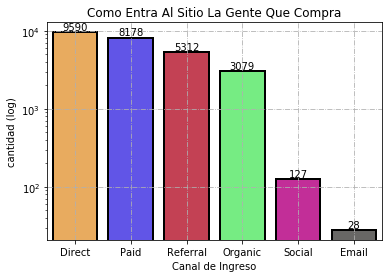

In [27]:
colores = ['#ffad48', '#4d3dff', '#d92b45', '#63ff73', '#db15a3', '#696764']

p = sns.countplot(data=visit_who_buys, x = 'channel',edgecolor=(0,0,0), linewidth=2, order = visit_who_buys['channel'].value_counts().index, palette=colores)
p.axes.set_yscale('log')
p.set_title('Como Entra Al Sitio La Gente Que Compra')
p.set_ylabel('cantidad (log)')
p.set_xlabel('Canal de Ingreso')
p.grid(True, which='major', linestyle='-.', axis='x' )
p.grid(True, which='major', linestyle='-.', axis='y' )
for patch in p.patches:
    x=patch.get_bbox().get_points()[:,0]
    y=patch.get_bbox().get_points()[1,1]
    p.annotate('{:.0f}'.format(y), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text